# Image Transformations

Geometrical image transformations refer to operations that modify the spatial properties of an image. These transformations can change the size, position, shape, or orientation of objects within the image.

Following are the steps to transform an image:

1. Load Image.
2. Create a coordinate grid of the image size.
3. Create a transformation matrix.
4. Transform the coordinates.
5. Apply the transformation to the image.

### 1. Load and Show the input Image

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the image in grayscale
image_path = 'multiple_blocks.png'
img = cv2.imread(image_path, 0)
img = cv2.resize(img, (64,64))

# Create a figure placeholder
fig = plt.figure(figsize=(12, 5))

# show original image on a subplot
plt.title(' image ')
plt.set_cmap('gray')
plt.imshow(img)

### 2. Create Coordinate Grid of the mage size

In [ ]:
# X array and Y array
x_ = [i for i in range(img.shape[0])]
y_ = [i for i in range(img.shape[1])]

# Create bias array
ones = np.array([1 for i in range(img.shape[0] * img.shape[1])])

# Create Grid for coordinate transformation
x,y = np.meshgrid(x_, y_)
xy = np.vstack([x.flatten(), y.flatten(), ones]).transpose([1, 0])

### 3. Create Transformation Matrix

In [23]:
# Create a tranformation matrix to rotate the image with the given theta
theta = 15 * np.pi / 180
tx_rot = np.array([[np.cos(theta), np.sin(theta), 0],
                  [-np.sin(theta), np.cos(theta), 0],
                  [      0,           0,          1]])

tx_scale = np.array([[0.5,  0,  0],
                     [0,   0.5, 0],
                     [0,    0,  1]])

### 4. Transform the coordinates

In [24]:
tx_xy = xy.dot(tx_rot)

### 5. Apply the transformation to the Image

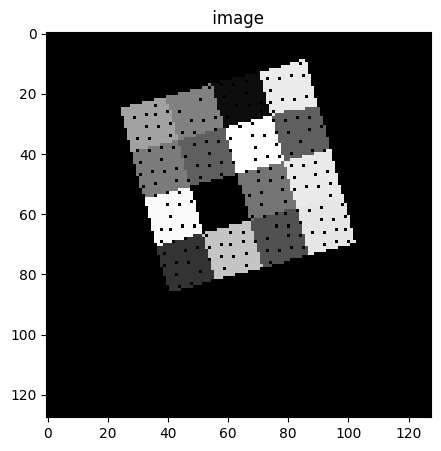

In [25]:
tx_img = np.zeros((2 * img.shape[0], 2 * img.shape[1]), dtype="uint8")
for i in range(len(tx_xy)):
    tx_x = int((tx_xy[i, 0])) + 25
    tx_y = int((tx_xy[i, 1])) + 25

    # tx_x = int(np.clip(tx_xy[i, 0], 0, img.shape[0] - 1))
    # tx_y = int(np.clip(tx_xy[i, 1], 0, img.shape[1] - 1))

    tx_img[tx_x, tx_y] = img[xy[i, 0], xy[i, 1]]

# Create a figure placeholder
fig = plt.figure(figsize=(12, 5))

# show original image on a subplot
plt.title(' image ')
plt.set_cmap('gray')
plt.imshow(tx_img)

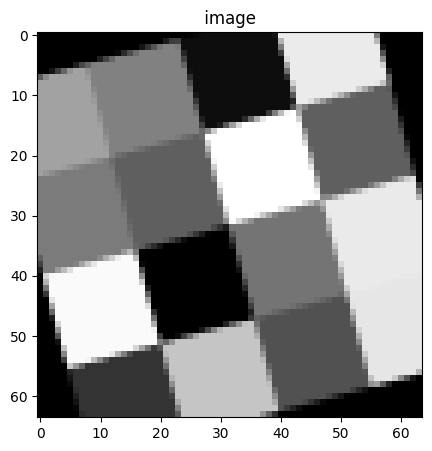

In [13]:
# OpenCV example
angle = 15
rows, cols = img.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
rotated_image = cv2.warpAffine(img, rotation_matrix, (cols, rows))

# Create a figure placeholder
fig = plt.figure(figsize=(12, 5))

# show original image on a subplot
plt.title(' image ')
plt.set_cmap('gray')
plt.imshow(rotated_image)